In [111]:
import pandas as pd
seaplane = pd.read_csv('C:\\edureka\\PR_Class_13\\Data_set\\SeaPlaneTravel.csv',parse_dates=['Month'], index_col='Month')
seaplane.head()

,#Passengers
Month,
2003-01-01,112
2003-02-01,118
2003-03-01,132
2003-04-01,129
2003-05-01,121


In [112]:
# or use the following code
seaplane = pd.read_csv('C:\\edureka\\PR_Class_13\\Data_set\\SeaPlaneTravel.csv')
seaplane['Month'] = pd.to_datetime(seaplane['Month'])
indexed_seaplane = seaplane.set_index('Month')
indexed_seaplane.head()

,#Passengers
Month,
2003-01-01,112
2003-02-01,118
2003-03-01,132
2003-04-01,129
2003-05-01,121


In [113]:
indexed_seaplane.shape

(144, 1)

In [114]:
type(indexed_seaplane)

pandas.core.frame.DataFrame

In [115]:
series_indexed_seaplane = indexed_seaplane['#Passengers']
series_indexed_seaplane
type(series_indexed_seaplane)

pandas.core.series.Series

In [116]:
indexed_seaplane.index

DatetimeIndex(['2003-01-01', '2003-02-01', '2003-03-01', '2003-04-01',
               '2003-05-01', '2003-06-01', '2003-07-01', '2003-08-01',
               '2003-09-01', '2003-10-01',
               ...
               '2015-03-01', '2015-04-01', '2015-05-01', '2015-06-01',
               '2015-07-01', '2015-08-01', '2015-09-01', '2015-10-01',
               '2015-11-01', '2015-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

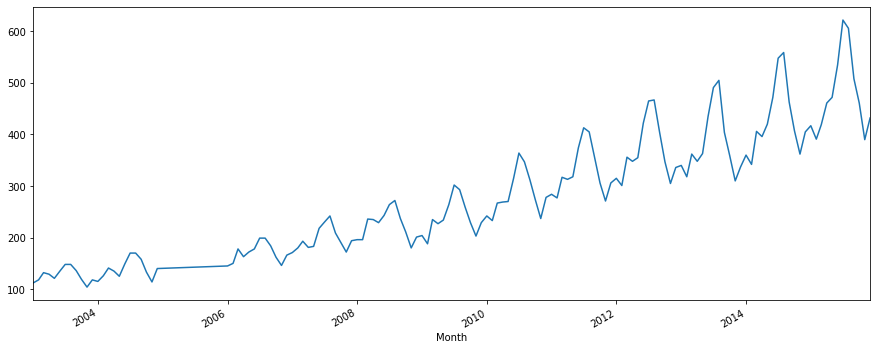

In [117]:
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
series_indexed_seaplane.plot()

In [118]:
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error

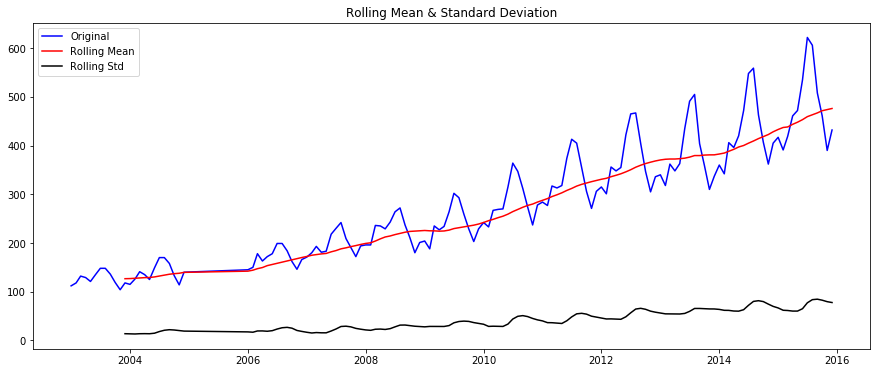

Results of Dickey-Fuller Test:
<class 'tuple'>
(0.8153688792060423, 0.9918802434376409, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598})
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [119]:
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12,center=False).mean() 
    rolstd = timeseries.rolling(window=12,center=False).std()
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    print(type(dftest))
    print(dftest[0:5])
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
test_stationarity(series_indexed_seaplane)

Converting the series_indexed_seaplane to log scale to stationarize the series because the ADF unit root test for null hypothesis on series_indexed_seaplane cannot rejected

In [120]:
import numpy as np
series_indexed_seaplane_log = np.log(series_indexed_seaplane)
series_indexed_seaplane_log

Month
2003-01-01    4.718499
2003-02-01    4.770685
2003-03-01    4.882802
2003-04-01    4.859812
2003-05-01    4.795791
                ...   
2015-08-01    6.406880
2015-09-01    6.230481
2015-10-01    6.133398
2015-11-01    5.966147
2015-12-01    6.068426
Name: #Passengers, Length: 144, dtype: float64

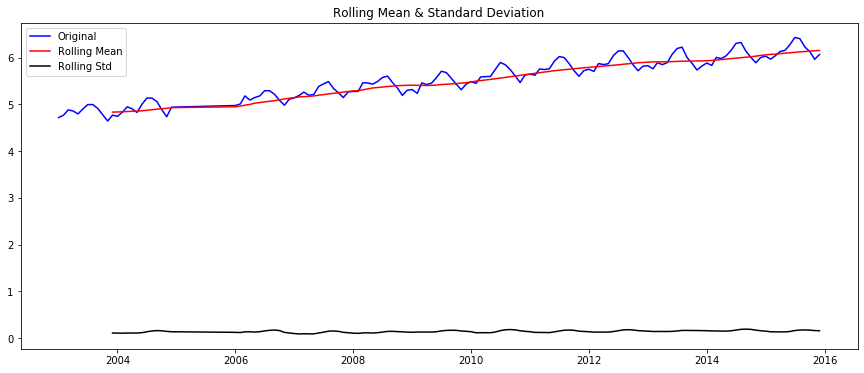

Results of Dickey-Fuller Test:
<class 'tuple'>
(-1.7170170891069714, 0.4223667747703857, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598})
Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [121]:
test_stationarity(series_indexed_seaplane_log)

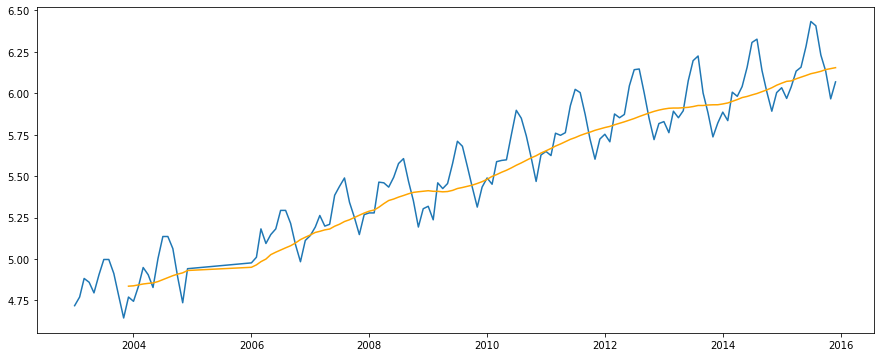

In [123]:
movingAverage = series_indexed_seaplane_log.rolling(window=12).mean()
movingstd = series_indexed_seaplane_log.rolling(window=12).std()
plt.plot(series_indexed_seaplane_log)
plt.plot(movingAverage, color='orange')

In [124]:
movingAverage.head(20)
movingAverage.dropna(inplace=True)
movingAverage

Month
2003-12-01    4.836178
2004-01-01    4.838381
2004-02-01    4.843848
2004-03-01    4.849344
2004-04-01    4.853133
                ...   
2015-08-01    6.124517
2015-09-01    6.132246
2015-10-01    6.142628
2015-11-01    6.148837
2015-12-01    6.154215
Name: #Passengers, Length: 133, dtype: float64

Integrated order of 1 to further startionarize the series_indexed_seaplane_log

In [125]:
seaplanelog_diff_movingAverage = series_indexed_seaplane_log-movingAverage
seaplanelog_diff_movingAverage.dropna(inplace=True)
seaplanelog_diff_movingAverage

Month
2003-12-01   -0.065494
2004-01-01   -0.093449
2004-02-01   -0.007566
2004-03-01    0.099416
2004-04-01    0.052142
                ...   
2015-08-01    0.282363
2015-09-01    0.098235
2015-10-01   -0.009230
2015-11-01   -0.182690
2015-12-01   -0.085789
Name: #Passengers, Length: 133, dtype: float64

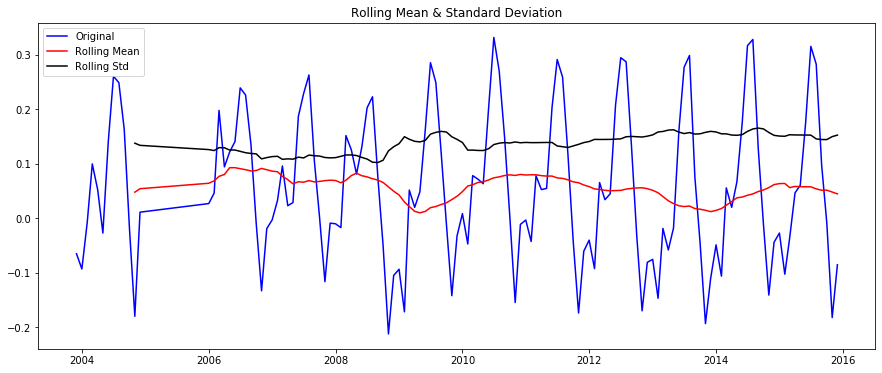

Results of Dickey-Fuller Test:
<class 'tuple'>
(-3.162907991300858, 0.022234630001243844, 13, 119, {'1%': -3.4865346059036564, '5%': -2.8861509858476264, '10%': -2.579896092790057})
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [126]:
test_stationarity(seaplanelog_diff_movingAverage)

Month
2004-01-01   -0.027955
2004-02-01    0.085883
2004-03-01    0.106981
2004-04-01   -0.047274
2004-05-01   -0.079671
                ...   
2015-08-01   -0.032788
2015-09-01   -0.184128
2015-10-01   -0.107465
2015-11-01   -0.173460
2015-12-01    0.096901
Name: #Passengers, Length: 132, dtype: float64

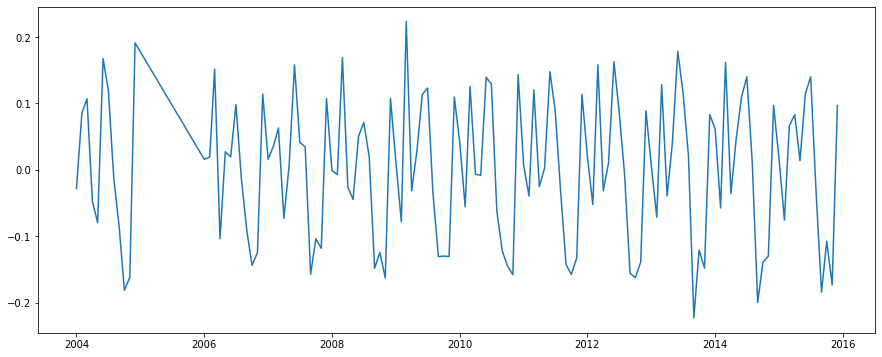

In [127]:
seaplanelog_diff_movingAverage_shift = seaplanelog_diff_movingAverage - seaplanelog_diff_movingAverage.shift(1)
seaplanelog_diff_movingAverage_shift.dropna(inplace=True)
plt.plot(seaplanelog_diff_movingAverage_shift)
seaplanelog_diff_movingAverage_shift

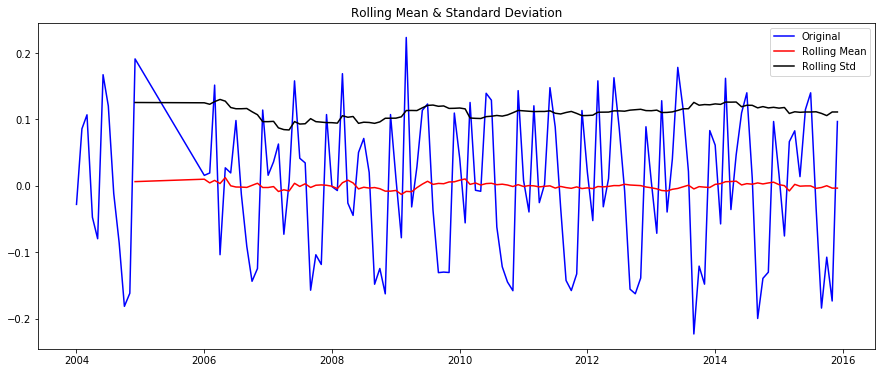

Results of Dickey-Fuller Test:
<class 'tuple'>
(-3.912981245419507, 0.0019413623769365253, 13, 118, {'1%': -3.4870216863700767, '5%': -2.8863625166643136, '10%': -2.580009026141913})
Test Statistic                  -3.912981
p-value                          0.001941
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64


In [128]:
test_stationarity(seaplanelog_diff_movingAverage_shift)

Now the data is stationary

In [129]:
#ACF and PACF
lag_acf = acf(seaplanelog_diff_movingAverage_shift, nlags=10)
#lag_acf ----gives an array of auto correlations of the coeff of each lags upto 10 tags
lag_pacf = pacf(seaplanelog_diff_movingAverage_shift, nlags=10, method='ols')
#lag_pacf

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Autocorrelation Function')

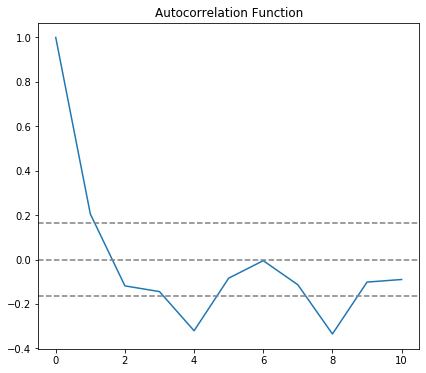

In [130]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(series_indexed_seaplane_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(series_indexed_seaplane_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

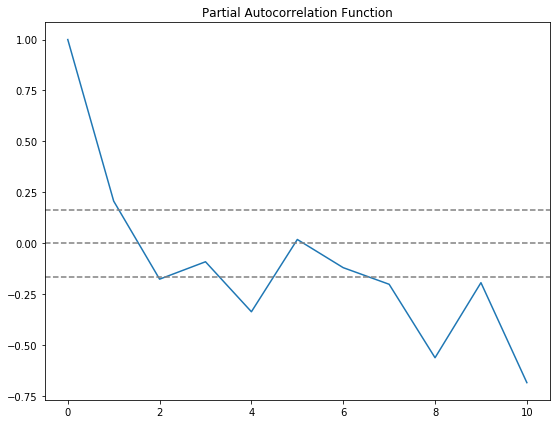

In [131]:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(series_indexed_seaplane_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(series_indexed_seaplane_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

ARIMA Model - p=2,d=1,q=1

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Month
2004-01-01   -0.000193
2004-02-01    0.004009
2004-03-01   -0.011287
2004-04-01   -0.029992
2004-05-01   -0.017537
                ...   
2015-08-01   -0.081583
2015-09-01   -0.071350
2015-10-01   -0.016499
2015-11-01    0.015308
2015-12-01    0.066384
Length: 132, dtype: float64
$$$$$$$$
<class 'pandas.core.series.Series'>


Text(0.5, 1.0, 'RSS: 1.3043')

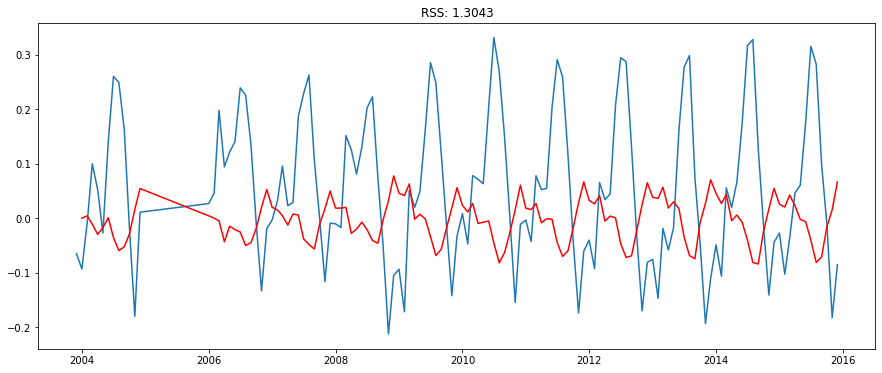

In [159]:
model = ARIMA(seaplanelog_diff_movingAverage, order=(1, 1, 1))  
results_ARIMA = model.fit(disp=0)  
#print(results_ARIMA) this is not printable
print(results_ARIMA.fittedvalues)
print('$$$$$$$$')
print(type(results_ARIMA.fittedvalues))
plt.plot(seaplanelog_diff_movingAverage)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-seaplanelog_diff_movingAverage_shift)**2))

                             ARIMA Model Results                              
Dep. Variable:          D.#Passengers   No. Observations:                  132
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 117.345
Method:                       css-mle   S.D. of innovations              0.098
Date:                Sun, 24 Nov 2019   AIC                           -226.691
Time:                        09:24:22   BIC                           -215.160
Sample:                             1   HQIC                          -222.005
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0002      0.001     -0.277      0.782      -0.002       0.001
ar.L1.D.#Passengers     0.6972      0.065     10.803      0.000       0.571       0.824
ma.L1.D.#Passeng

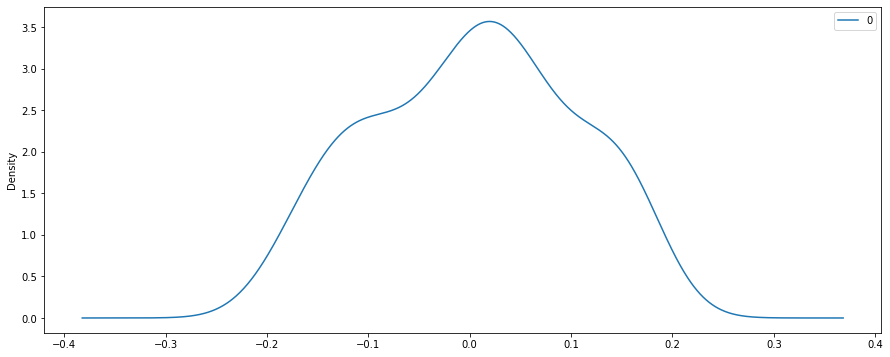

In [160]:
print(results_ARIMA.summary())
# plot residual errors
residuals = pd.DataFrame(results_ARIMA.resid)
print(type(residuals))
print(residuals)
#Kernel density estimation or KDE is a non-parametric way to estimate the probability density function of a random variable. In other words the aim of KDE is to find probability density function (PDF) for a given dataset. ... Well, it smooths the around values of PDF.
residuals.plot(kind='kde')
print(residuals.describe())

#Datatransformation to actual

In [161]:
#step1
seaplanelog_diff_movingAverage_first_value = pd.Series(seaplanelog_diff_movingAverage.iloc[0], index=seaplanelog_diff_movingAverage.index)
seaplanelog_diff_movingAverage_first_value

Month
2003-12-01   -0.065494
2004-01-01   -0.065494
2004-02-01   -0.065494
2004-03-01   -0.065494
2004-04-01   -0.065494
                ...   
2015-08-01   -0.065494
2015-09-01   -0.065494
2015-10-01   -0.065494
2015-11-01   -0.065494
2015-12-01   -0.065494
Length: 133, dtype: float64

In [162]:
#step 2
cumsum_fitted = results_ARIMA.fittedvalues.cumsum()
print(cumsum_fitted)
#predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
#print(predictions_ARIMA_log)
#predictions_ARIMA = np.exp(predictions_ARIMA_log)
#plt.plot(series_indexed_seaplane)
#plt.plot(predictions_ARIMA)

Month
2004-01-01   -0.000193
2004-02-01    0.003816
2004-03-01   -0.007471
2004-04-01   -0.037463
2004-05-01   -0.055000
                ...   
2015-08-01   -0.461170
2015-09-01   -0.532520
2015-10-01   -0.549019
2015-11-01   -0.533711
2015-12-01   -0.467327
Length: 132, dtype: float64


In [163]:
#step 3:converting to seaplanelog_diff_movingAverage
seaplanelog_diff_movingAverage_pred = seaplanelog_diff_movingAverage_first_value.add(cumsum_fitted,fill_value=0)
print(seaplanelog_diff_movingAverage_pred)

Month
2003-12-01   -0.065494
2004-01-01   -0.065687
2004-02-01   -0.061678
2004-03-01   -0.072964
2004-04-01   -0.102957
                ...   
2015-08-01   -0.526664
2015-09-01   -0.598014
2015-10-01   -0.614513
2015-11-01   -0.599205
2015-12-01   -0.532821
Length: 133, dtype: float64


In [164]:
#tep4 - converting to logscale back
series_indexed_seaplane_log_pred = seaplanelog_diff_movingAverage_pred + movingAverage
series_indexed_seaplane_log_pred

Month
2003-12-01    4.770685
2004-01-01    4.772694
2004-02-01    4.782170
2004-03-01    4.776380
2004-04-01    4.750176
                ...   
2015-08-01    5.597852
2015-09-01    5.534232
2015-10-01    5.528115
2015-11-01    5.549631
2015-12-01    5.621394
Length: 133, dtype: float64

In [165]:
series_indexed_seaplane.loc['2003-12-01':]

Month
2003-12-01    118
2004-01-01    115
2004-02-01    126
2004-03-01    141
2004-04-01    135
             ... 
2015-08-01    606
2015-09-01    508
2015-10-01    461
2015-11-01    390
2015-12-01    432
Name: #Passengers, Length: 133, dtype: int64

Mean squared error: 132.95482869125405


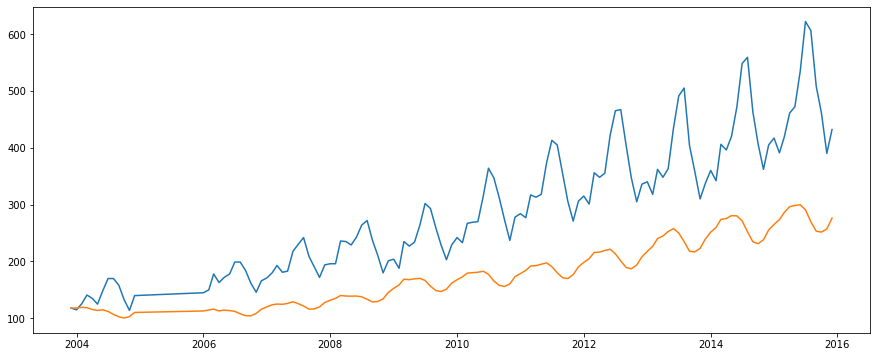

In [166]:
#step5: converting to actual scale
predictions_ARIMA = np.exp(series_indexed_seaplane_log_pred)
predictions_ARIMA
plt.plot(series_indexed_seaplane.loc['2003-12-01':])
plt.plot(predictions_ARIMA)
#plt.title('RMSE: %.6f'% np.sqrt(sum((predictions_ARIMA-series_indexed_seaplane.loc['2003-12-01':])**2)/(133)))
from sklearn import metrics
print('Mean squared error:',np.sqrt(metrics.mean_squared_error(series_indexed_seaplane.loc['2003-12-01':],predictions_ARIMA)))

prediction for next 5 years: 144 (last 10 years - given data) + 120( next 5 years 60 months)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


array([0.09827138, 0.11980236, 0.128979  , 0.13321298, 0.13522408,
       0.13619151, 0.13665966, 0.1368869 , 0.13699739, 0.13705119,
       0.13707741, 0.13709021, 0.13709647, 0.13709953, 0.13710104,
       0.13710179, 0.13710216, 0.13710235, 0.13710245, 0.1371025 ,
       0.13710252, 0.13710254, 0.13710255, 0.13710255, 0.13710256,
       0.13710256, 0.13710256, 0.13710256, 0.13710256, 0.13710256,
       0.13710256, 0.13710256, 0.13710256, 0.13710257, 0.13710257,
       0.13710257, 0.13710257, 0.13710257, 0.13710257, 0.13710257,
       0.13710257, 0.13710257, 0.13710257, 0.13710257, 0.13710257,
       0.13710257, 0.13710257, 0.13710257, 0.13710258, 0.13710258,
       0.13710258, 0.13710258, 0.13710258, 0.13710258, 0.13710258,
       0.13710258, 0.13710258, 0.13710258, 0.13710258, 0.13710258])

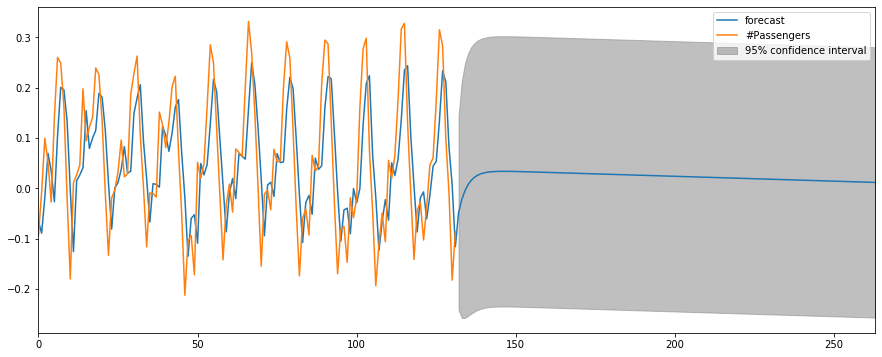

In [167]:
results_ARIMA.plot_predict(1,264)
x = results_ARIMA.forecast(steps=60)
x[1]

In [168]:
len(x[1])

60

In [169]:
np.exp(x[1])

array([1.10326215, 1.12727404, 1.13766624, 1.1424933 , 1.14479328,
       1.14590132, 1.14643791, 1.14669845, 1.14682516, 1.14688685,
       1.14691693, 1.1469316 , 1.14693878, 1.1469423 , 1.14694404,
       1.14694489, 1.14694532, 1.14694553, 1.14694564, 1.1469457 ,
       1.14694573, 1.14694575, 1.14694576, 1.14694576, 1.14694577,
       1.14694577, 1.14694577, 1.14694577, 1.14694578, 1.14694578,
       1.14694578, 1.14694578, 1.14694578, 1.14694578, 1.14694578,
       1.14694578, 1.14694578, 1.14694578, 1.14694578, 1.14694578,
       1.14694578, 1.14694579, 1.14694579, 1.14694579, 1.14694579,
       1.14694579, 1.14694579, 1.14694579, 1.14694579, 1.14694579,
       1.14694579, 1.14694579, 1.14694579, 1.14694579, 1.14694579,
       1.1469458 , 1.1469458 , 1.1469458 , 1.1469458 , 1.1469458 ])

# end--------